In [1]:
#import libraries and some constants

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import scipy
import pandas as pd
import uproot3 as ur
import tensorflow as tf
import atlas_mpl_style as ampl

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 20)

ampl.use_atlas_style()
params = {'legend.fontsize': 13,
          'axes.labelsize': 18}
plt.rcParams.update(params)

# path_prefix = '/AL/Phd/maxml/'
# plotpath = path_prefix+'caloml-atlas/inputs/Plots/'
# modelpath = path_prefix+'caloml-atlas/classifier/Models/'
# %config InlineBackend.figure_format = 'svg'

# # metadata
# layers = ["EMB1", "EMB2", "EMB3", "TileBar0", "TileBar1", "TileBar2"]
# cell_size_phi = [0.098, 0.0245, 0.0245, 0.1, 0.1, 0.1]
# cell_size_eta = [0.0031, 0.025, 0.05, 0.1, 0.1, 0.2]
# len_phi = [4, 16, 16, 4, 4, 4]
# len_eta = [128, 16, 8, 4, 4, 2]

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=24220)]) #in MB

print("Num GPUs Available: ", len(gpus))
tf.config.list_physical_devices()

Num GPUs Available:  1


/global/home/users/mfong/anaconda3/envs/graph/lib/python3.8/site-packages/atlas_mpl_style/__init__.py:163: UserWarning: No LaTeX installation found -- atlas-mpl-style is falling back to usetex=False
  _warn.warn(


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
inputpath = "/clusterfs/ml4hep/mfong/ML4Pions/MLTreeData/"
inputpath_pi0 = inputpath + "user.angerami.mc16_13TeV.900246.PG_singlepi0_logE0p2to2000.e8312_e7400_s3170_r12383.v01-45-gaa27bcb_OutputStream/"
inputpath_pion = inputpath + "user.angerami.mc16_13TeV.900247.PG_singlepion_logE0p2to2000.e8312_e7400_s3170_r12383.v01-45-gaa27bcb_OutputStream/"

branches = ['runNumber', 'eventNumber', 'truthE', 'truthPt', 'truthEta',
            'truthPhi', 'clusterIndex', 'nCluster', 'clusterE',
            'clusterECalib', 'clusterPt', 'clusterEta', 'clusterPhi',
            'cluster_nCells', 'cluster_sumCellE', 'cluster_ENG_CALIB_TOT',
            'cluster_ENG_CALIB_OUT_T', 'cluster_ENG_CALIB_DEAD_TOT',
            'cluster_EM_PROBABILITY', 'cluster_HAD_WEIGHT',
            'cluster_OOC_WEIGHT', 'cluster_DM_WEIGHT', 'cluster_CENTER_MAG',
            'cluster_FIRST_ENG_DENS', 'cluster_cell_dR_min',
            'cluster_cell_dR_max', 'cluster_cell_dEta_min',
            'cluster_cell_dEta_max', 'cluster_cell_dPhi_min',
            'cluster_cell_dPhi_max', 'cluster_cell_centerCellEta',
            'cluster_cell_centerCellPhi', 'cluster_cell_centerCellLayer',
            'cluster_cellE_norm']
geo_branches = [
    'cell_geo_ID', 'cell_geo_sampling', 'cell_geo_eta', 'cell_geo_phi',
    'cell_geo_rPerp', 'cell_geo_deta', 'cell_geo_dphi', 'cell_geo_volume',
    'cell_geo_sigma'
]

In [3]:
infile = ur.open(inputpath_pi0 + 'user.angerami.24559740.OutputStream._000011.root')

In [4]:
geo_df = infile['CellGeo'].pandas.df(geo_branches)
geo_df

# eta and phi angles
# rPerp distance in mm from center

# cell_geo_deta is size of cell
# cell_geo_dphi is size of cell
# cell_geo_volume is volume of cell

# cell_geo_sigma is noise

cell_geo_ID  cell_geo_sampling  cell_geo_eta  cell_geo_phi  \
entry subentry                                                               
0     0           740294656                  6     -2.559710      0.053900   
      1           740294658                  6     -2.559648      0.151909   
      2           740294660                  6     -2.559603      0.249912   
      3           740294662                  6     -2.559574      0.347912   
      4           740294664                  6     -2.559562      0.445909   
...                     ...                ...           ...           ...   
      187645     1284491536                 15      0.958372     -0.049087   
      187646     1284491824                 17      1.058902     -0.049087   
      187647     1284492080                 17      1.159304     -0.049087   
      187648     1284492592                 17      1.309847     -0.049087   
      187649     1284493104                 17      1.510363     -0.049087   

                cell_geo_rPerp  cell_geo_deta  cell_geo_dphi  cell_geo_volume  \
entry subentry                                                                  
0     0             617.735962            0.1       0.098175     1.697610e+06   
      1             617.774719            0.1       0.098175     1.697610e+06   
      2             617.803223            0.1       0.098175     1.697610e+06   
      3             617.821167            0.1       0.098175     1.697610e+06   
      4             617.828552            0.1       0.098175     1.697610e+06   
...                        ...            ...            ...              ...   
      187645       3215.000000            0.1       0.098175     1.346147e+07   
      187646       2809.000000            0.1       0.098175     1.341334e+06   
      187647       2477.000000            0.1       0.098175     1.241210e+06   
      187648       2060.000000            0.2       0.098175     7.739876e+05   
      187649       1640.000000            0.2       0.098175     4.666501e+05   

                cell_geo_sigma  
entry subentry                  
0     0              49.457161  
      1              49.457161  
      2              49.457161  
      3              49.457161  
      4              49.457161  
...                        ...  
      187645         20.233513  
      187646         10.413343  
      187647         10.957963  
      187648         12.509910  
      187649         11.231500  

[187650 rows x 9 columns]

In [5]:
df_all_cols = infile['EventTree'].pandas.df(flatten=False)
df = df_all_cols[['cluster_cell_ID', 'cluster_cell_E', 'cluster_Eta', 'cluster_Phi']]
df

/global/home/users/mfong/anaconda3/envs/graph/lib/python3.8/site-packages/awkward0/array/base.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return cls.numpy.array(value, copy=False)


,cluster_cell_ID,cluster_cell_E,cluster_Eta,cluster_Phi
entry,,,,
0,[],[],[],[]
1,"[[759192106, 759192104, 759192108, 759191594, ...","[[77.977806, 24.14488, 4.869435, 2.659961, 21....",[-1.143686],[0.5293207]
2,"[[751056134, 751056132, 751056136, 751055622, ...","[[413.32898, 48.909393, 90.18763, 39.86163, 27...",[-2.0994453],[-3.0541317]
3,"[[751053140, 751053138, 751053142, 751052628, ...","[[1.652616, 0.11616877, 0.71565634, 0.10801599...","[-1.9524345, -1.9014493]","[-2.0981069, -1.982254]"
4,"[[749243440, 749243442, 749242928, 749243952, ...","[[0.25986475, 0.048873316, 0.0951039, 0.186739...",[-1.7287459],[2.4218318]
...,...,...,...,...
19995,"[[749757984, 749757986, 749757472, 749758496, ...","[[0.6816676, 0.008014569, 0.2565823, 0.3002508...",[-2.3337884],[1.6153674]
19996,"[[759180956, 759180954, 759180958, 759180444, ...","[[64.28961, 3.8230877, 12.329029, 2.738421, 3....",[-0.58717525],[1.9303617]
19997,"[[740295258, 740295256, 740295260, 740294746, ...","[[56.3288, 5.3618994, 7.271554, 1.4210855, 1.7...",[-2.6642337],[-1.8128626]


In [6]:
df[df["cluster_cell_E"].map(len) == 0]

,cluster_cell_ID,cluster_cell_E,cluster_Eta,cluster_Phi
entry,,,,
0,[],[],[],[]
6,[],[],[],[]
10,[],[],[],[]
13,[],[],[],[]
14,[],[],[],[]
...,...,...,...,...
19982,[],[],[],[]
19989,[],[],[],[]
19990,[],[],[],[]


In [7]:
test = pd.DataFrame(
    df_all_cols[df_all_cols["cluster_cell_E"].map(len) == 0]["truthPartStatus"].apply(pd.Series).stack().reset_index(drop=True)
)
test.columns = ["truthPartStatus"]
test["truthPartE"] = df_all_cols[df_all_cols["cluster_cell_E"].map(len) == 0]["truthPartE"].apply(pd.Series).stack().reset_index(drop=True)
test = test[test["truthPartStatus"] == 1]
test

,truthPartStatus,truthPartE
1,1.0,0.024655
2,1.0,0.273441
4,1.0,0.268781
5,1.0,0.501436
7,1.0,0.179737
...,...,...
17097,1.0,0.714243
17099,1.0,0.496960
17100,1.0,0.052635
17102,1.0,0.221311


In [8]:
test["truthPartE"].describe()

count    11429.000000
mean         1.417785
std         16.441696
min          0.001119
25%          0.153141
50%          0.354900
75%          0.958726
max       1287.035889
Name: truthPartE, dtype: float64

(0.0, 1.0, 0.0, 3.0)

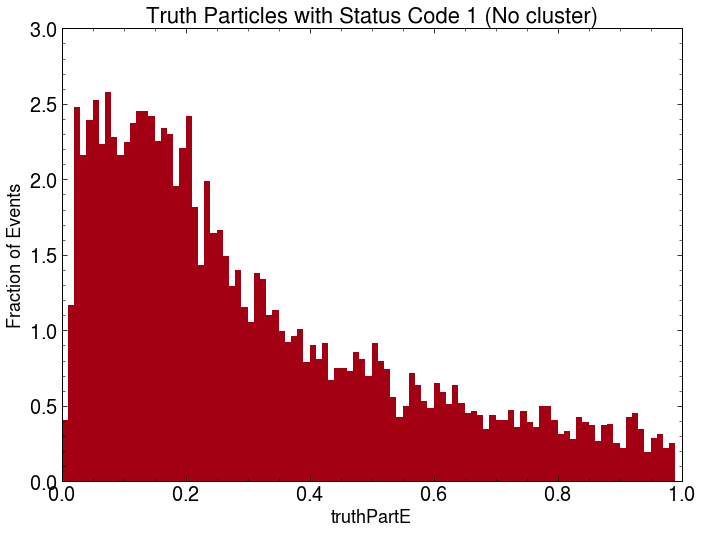

In [9]:
plt.hist(test["truthPartE"], bins = [x/100 for x in range(0, 100)], density=True)
plt.xlabel("truthPartE")
plt.ylabel("Fraction of Events")
plt.title("Truth Particles with Status Code 1 (No cluster)")
plt.axis([0, 1, 0, 3])

In [10]:
df["cluster_cell_ID"][3]

[[751053140,
  751053138,
  751053142,
  751052628,
  751053652,
  751052626,
  751053650,
  751052630,
  751053654,
  749485140,
  749485652,
  749486164,
  749486676,
  749487188,
  749487700,
  749486678,
  749486162,
  751053136,
  749487702,
  751053144,
  749485654,
  749488212],
 [751052126,
  751052124,
  751052128,
  751052638,
  751051612,
  751051616,
  749480022,
  749480534,
  749481046,
  749481558,
  752881502,
  749480532,
  749481556]]

In [11]:
geo_df[geo_df["cell_geo_ID"] == 751053140]

,,cell_geo_ID,cell_geo_sampling,cell_geo_eta,cell_geo_phi,cell_geo_rPerp,cell_geo_deta,cell_geo_dphi,cell_geo_volume,cell_geo_sigma
entry,subentry,,,,,,,,,
0,21034,751053140,6,-1.9504,-2.093864,1159.241455,0.025,0.024544,275373.0,27.867857


In [12]:
df.iloc[1]

cluster_cell_ID    [[759192106, 759192104, 759192108, 759191594, ...
cluster_cell_E     [[77.977806, 24.14488, 4.869435, 2.659961, 21....
cluster_Eta                                              [-1.143686]
cluster_Phi                                              [0.5293207]
Name: 1, dtype: object

In [13]:
# throw out empty particles in out layer []

def make_graph(event: pd.Series, geo_df: pd.DataFrame):
    """
    inputs
    event (pd.Series) one event/row from EventTree
    geo_df (pd.DataFrame) the CellGeo DataFrame mapping cell_geo_ID to information about the cell
    
    returns
    A graph representation of the event for the GNN
    returns (None, None) if no cell energies detected
    """
    assert len(event["cluster_cell_E"]) == len(event["cluster_cell_ID"]), "Error: Missmatched len of cluster_cell_E and cluster_cell_ID"
    if len(event["cluster_cell_E"]) == 0:
        return None, None    
    
    temp_df = geo_df[geo_df["cell_geo_ID"].isin([item for sublist in event["cluster_cell_ID"] for item in sublist])]
    temp_df = temp_df.set_index("cell_geo_ID")
    for cell_id, cell_e in zip(
        [item for sublist in event["cluster_cell_ID"] for item in sublist],
        [item for sublist in event["cluster_cell_E"] for item in sublist]
    ):
#         print(cell_id, cell_e)
        temp_df.loc[int(cell_id), "cell_E"] = cell_e
    
    # TODO make the graph from the df    
    
    
    
    
    
    return temp_df

In [14]:
len(df.iloc[3]["cluster_cell_ID"])
len(df.iloc[3]["cluster_cell_E"])

2

In [15]:
geo_df[geo_df["cell_geo_ID"] == 749481558]

,,cell_geo_ID,cell_geo_sampling,cell_geo_eta,cell_geo_phi,cell_geo_rPerp,cell_geo_deta,cell_geo_dphi,cell_geo_volume,cell_geo_sigma
entry,subentry,,,,,,,,,
0,9579,749481558,5,-1.911471,-2.007887,1146.489746,0.004167,0.098175,52627.898438,13.058378


In [16]:
make_graph(df.iloc[1], geo_df)

,cell_geo_sampling,cell_geo_eta,cell_geo_phi,cell_geo_rPerp,cell_geo_deta,cell_geo_dphi,cell_geo_volume,cell_geo_sigma,cell_E
cell_geo_ID,,,,,,,,,
754997258,0,-1.112094,0.541559,1455.371704,0.025,0.098175,0.0,37.354420,0.282466
754997768,0,-1.137005,0.443304,1455.587891,0.025,0.098175,0.0,37.551403,0.083780
754997770,0,-1.137126,0.541559,1455.371704,0.025,0.098175,0.0,37.551403,11.485039
754998282,0,-1.162158,0.541559,1455.371704,0.025,0.098175,0.0,37.399971,2.067950
754998794,0,-1.187189,0.541559,1455.371704,0.025,0.098175,0.0,37.505020,0.458767
...,...,...,...,...,...,...,...,...,...
761277994,3,-1.174946,0.529617,1890.635742,0.050,0.024544,1433420.0,24.490633,0.192079
761277996,3,-1.174969,0.554177,1890.583252,0.050,0.024544,1433420.0,24.490633,0.070131
761277998,3,-1.174991,0.578739,1890.531494,0.050,0.024544,1433420.0,24.490633,0.018022
